**Motivacion de la investigacion**

**Preguntas de Investigacion y objetivos.**

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def limpiar(string):
    r = ""
    for i in string:
        if i == "á":
            r += "a"
        elif i== "é":
            r += "e"
        elif i== "í":
            r += "i"
        elif i== "ó":
            r += "o"
        elif i== "ú":
            r += "u"
        else:
            r+=i
    return r

**Dataframe de tipo de institucion educativa preferente por alumnos saliendo de Cuarto Medio**

In [6]:
df_carreras = pd.read_excel('Dataframes/basedefinitivaindices_2005-2022.xlsx')
df_carreras.columns

Exception ignored in: <generator object iterparse.<locals>.iterator at 0x000002558160BBC0>
Traceback (most recent call last):
  File "c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\xml\etree\ElementTree.py", line 1270, in iterator
    if close_source:
KeyboardInterrupt: 


In [ ]:
df_col_filtradas = df_carreras[['Año','Nombre Institución','Nombre Region','Tipo Institución','Promedio Puntaje (promedio matemáticas y lenguaje)','Promedio Puntaje NEM','Promedio Puntaje Ranking']]
df_col_filtradas.head()

In [ ]:
df_col_filtradas = df_col_filtradas[df_col_filtradas['Nombre Region']=='Región Metropolitana'].reset_index(drop=True)
df_col_filtradas.head()

In [ ]:
promedio_institucion = df_col_filtradas.groupby(by='Tipo Institución',as_index=False).mean()
promedio_institucion

In [ ]:
media_institucion = df_col_filtradas.groupby(by='Tipo Institución',as_index=False).median()
media_institucion

In [ ]:
f, ax = plt.subplots(1,3,figsize=(16,5))
f.suptitle("Tipo de institución")
sns.barplot(data=promedio_institucion, x='Tipo Institución', y='Promedio Puntaje NEM', ax=ax[0])
sns.barplot(data=promedio_institucion, x='Tipo Institución', y='Promedio Puntaje Ranking',ax=ax[1])
sns.barplot(data=promedio_institucion, x='Tipo Institución', y='Promedio Puntaje (promedio matemáticas y lenguaje)',ax=ax[2])

**Dataframe de Ingresos y rendimiento PSU/Ranking/NEM por comuna**

In [4]:
#En caso de dar un error, recordar descomprimir Datos.rar
df_soc = pd.read_csv("Dataframes/Socioeconomico_2022.csv", delimiter=";")
df_soc = df_soc[["NOMBRE_COMUNA_DOMICILIO","INGRESO_PERCAPITA_GRUPO_FA","CUANTOS_TRABAJAN_GRUPO_FAM","CODIGO_REGION_DOMICILIO"]]

df_soc = df_soc[df_soc["CODIGO_REGION_DOMICILIO"] == 13].drop(columns="CODIGO_REGION_DOMICILIO")

df_soc.rename(columns={"NOMBRE_COMUNA_DOMICILIO": "COMUNA", "INGRESO_PERCAPITA_GRUPO_FA":"INGRESOS", "CUANTOS_TRABAJAN_GRUPO_FAM": "N_TRABAJAN"}, inplace=True)
df_soc["INGRESOS"] = df_soc["INGRESOS"].replace("99", np.nan)
df_soc["INGRESOS"] = df_soc["INGRESOS"].replace(" ", np.nan)
df_soc.INGRESOS = df_soc.INGRESOS.astype("float32")


df_soc["N_TRABAJAN"] = df_soc["N_TRABAJAN"].replace(16, 0)
df_soc["N_TRABAJAN"] = df_soc["N_TRABAJAN"].replace(99, np.nan)


df_soc_stats = df_soc.groupby(by="COMUNA").median()
df_soc_stats["N_TRABAJAN"] = df_soc[["COMUNA","N_TRABAJAN"]].groupby(by="COMUNA").mean()
df_soc_stats.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_15468\3308562537.py:2: DtypeWarning: Columns (34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_soc = pd.read_csv("Dataframes/Socioeconomico_2022.csv", delimiter=";")


,INGRESOS,N_TRABAJAN
COMUNA,,
ALHUE,3.0,0.908046
BUIN,4.0,1.115009
CALERA DE TANGO,5.0,1.214106
CERRILLOS,3.0,1.064081
CERRO NAVIA,3.0,1.107692


In [5]:
df = pd.read_csv("Dataframes/Puntajes_2022.csv", delimiter=";")
df[df.CLEC_ACTUAL == " "]
df.columns

Index(['MRUN', 'ANYO_PROCESO', 'COD_SEXO', 'FECHA_NACIMIENTO', 'RBD',
       'CODIGO_ENS', 'LOCAL_EDUCACIONAL', 'UNIDAD_EDUCATIVA',
       'NOMBRE_UNIDAD_EDUC', 'RAMA_EDUCACIONAL', 'DEPENDENCIA',
       'CODIGO_REGION_EGRESO', 'NOMBRE_REGION_EGRESO',
       'CODIGO_PROVINCIA_EGRESO', 'NOMBRE_PROVINCIA_EGRESO',
       'CODIGO_COMUNA_EGRESO', 'NOMBRE_COMUNA_EGRESO', 'ANYO_DE_EGRESO',
       'PROMEDIO_NOTAS', 'PTJE_NEM', 'PORC_SUP_NOTAS', 'PTJE_RANKING',
       'CLEC_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL',
       'PROM_CM_ACTUAL', 'PERCENTIL_CM_ACTUAL', 'BEA', 'CLEC_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'PROM_CM_ANTERIOR',
       'PERCENTIL_CM_ANTERIOR', 'PUNTAJES_PROCESO', 'PRUEBA_CL', 'FORMA_CL',
       'CORRECTAS_CL', 'ERRADAS_CL', 'OMITIDAS_CL', 'PRUEBA_MATE',
       'FORMA_MATE', 'CORRECTAS_MATE', 'ERRADAS_MATE', 'OMITIDAS_MATE',
       'PRUEBA_HCS', 'FORMA_HCS', 'CORRECTAS_HCS', 'ERRADAS_HCS',
       'OMITIDAS_HCS', 'PRUEBA_CBIO', 'FORMA_

In [6]:
df_puntajes = df[["PROMEDIO_NOTAS", "PTJE_RANKING", "CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL", "CIEN_ACTUAL", "NOMBRE_COMUNA_EGRESO", "ANYO_DE_EGRESO", "CODIGO_REGION_EGRESO"]]
df_puntajes = df_puntajes[df_puntajes["CODIGO_REGION_EGRESO"] == 13]
df_puntajes = df_puntajes[df_puntajes["ANYO_DE_EGRESO"] == 2021].reset_index().drop(columns=["CODIGO_REGION_EGRESO", "ANYO_DE_EGRESO", "index"])
df_puntajes.info()
df_puntajes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73526 entries, 0 to 73525
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROMEDIO_NOTAS        73526 non-null  object
 1   PTJE_RANKING          73526 non-null  int64 
 2   CLEC_ACTUAL           73526 non-null  object
 3   MATE_ACTUAL           73526 non-null  object
 4   HCSO_ACTUAL           73526 non-null  object
 5   CIEN_ACTUAL           73526 non-null  object
 6   NOMBRE_COMUNA_EGRESO  73526 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.9+ MB


,PROMEDIO_NOTAS,PTJE_RANKING,CLEC_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,NOMBRE_COMUNA_EGRESO
0,"6,35",772,303,369,373,0,CONCHALI
1,"5,5",583,384,396,479,0,COLINA
2,"6,45",850,0,0,0,0,HUECHURABA
3,"5,37",528,359,369,491,0,MACUL
4,"5,35",519,423,325,508,0,COLINA


In [7]:
l = ["CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL","CIEN_ACTUAL"]
for col in l:
    df_puntajes[col] = df_puntajes[col].replace(" ", np.nan)

    df_puntajes[col] = df_puntajes[col].replace("0", np.nan)


df_puntajes["PROMEDIO_NOTAS"] = df_puntajes["PROMEDIO_NOTAS"].replace(" ", np.nan)
df_puntajes['PROMEDIO_NOTAS'] = df_puntajes['PROMEDIO_NOTAS'].str.replace(',', '.')
df_puntajes = df_puntajes.astype({"CLEC_ACTUAL": "float32","MATE_ACTUAL": "float32","HCSO_ACTUAL": "float32","CIEN_ACTUAL": "float32", "NOMBRE_COMUNA_EGRESO": "category", "PROMEDIO_NOTAS": "float32"})
df_puntajes_grande = df_puntajes
df_puntajes.head()

,PROMEDIO_NOTAS,PTJE_RANKING,CLEC_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,NOMBRE_COMUNA_EGRESO
0,6.35,772,303.0,369.0,373.0,NaN,CONCHALI
1,5.50,583,384.0,396.0,479.0,NaN,COLINA
2,6.45,850,NaN,NaN,NaN,NaN,HUECHURABA
3,5.37,528,359.0,369.0,491.0,NaN,MACUL
4,5.35,519,423.0,325.0,508.0,NaN,COLINA


In [8]:
df_promedio = df_puntajes.groupby(by="NOMBRE_COMUNA_EGRESO").mean()
df_promedio.reset_index(inplace=True)
df_promedio = df_promedio.rename(columns={"NOMBRE_COMUNA_EGRESO":"COMUNA", "PTJE_RANKING" : "RANKING", "PROMEDIO_NOTAS": "NEM", "CLEC_ACTUAL": "LENGUAJE", "MATE_ACTUAL": "MATEMATICAS", "HCSO_ACTUAL" :"HISTORIA", "CIEN_ACTUAL": "CIENCIAS"})
df_promedio.to_csv("Dataframes/promedio_puntajes_pdt.csv", sep=",", index=False)
df_promedio.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS
0,ALHUE,5.768235,633.235294,398.822235,438.522736,414.592590,419.576935
1,BUIN,5.834584,596.377888,478.751984,489.613312,481.094910,478.683990
2,CALERA DE TANGO,6.062634,657.846975,520.878052,533.761108,523.261169,537.232239
3,CERRILLOS,5.695290,571.275214,488.194214,486.797913,479.683624,483.455780
4,CERRO NAVIA,5.707121,580.460606,434.112915,462.518677,446.877411,422.113464


In [9]:
len(df_promedio)

52

In [10]:
df_todo = df_promedio.merge(df_soc_stats, on="COMUNA")
df_todo.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS,INGRESOS,N_TRABAJAN
0,ALHUE,5.768235,633.235294,398.822235,438.522736,414.592590,419.576935,3.0,0.908046
1,BUIN,5.834584,596.377888,478.751984,489.613312,481.094910,478.683990,4.0,1.115009
2,CALERA DE TANGO,6.062634,657.846975,520.878052,533.761108,523.261169,537.232239,5.0,1.214106
3,CERRILLOS,5.695290,571.275214,488.194214,486.797913,479.683624,483.455780,3.0,1.064081
4,CERRO NAVIA,5.707121,580.460606,434.112915,462.518677,446.877411,422.113464,3.0,1.107692


(350.0, 750.0)

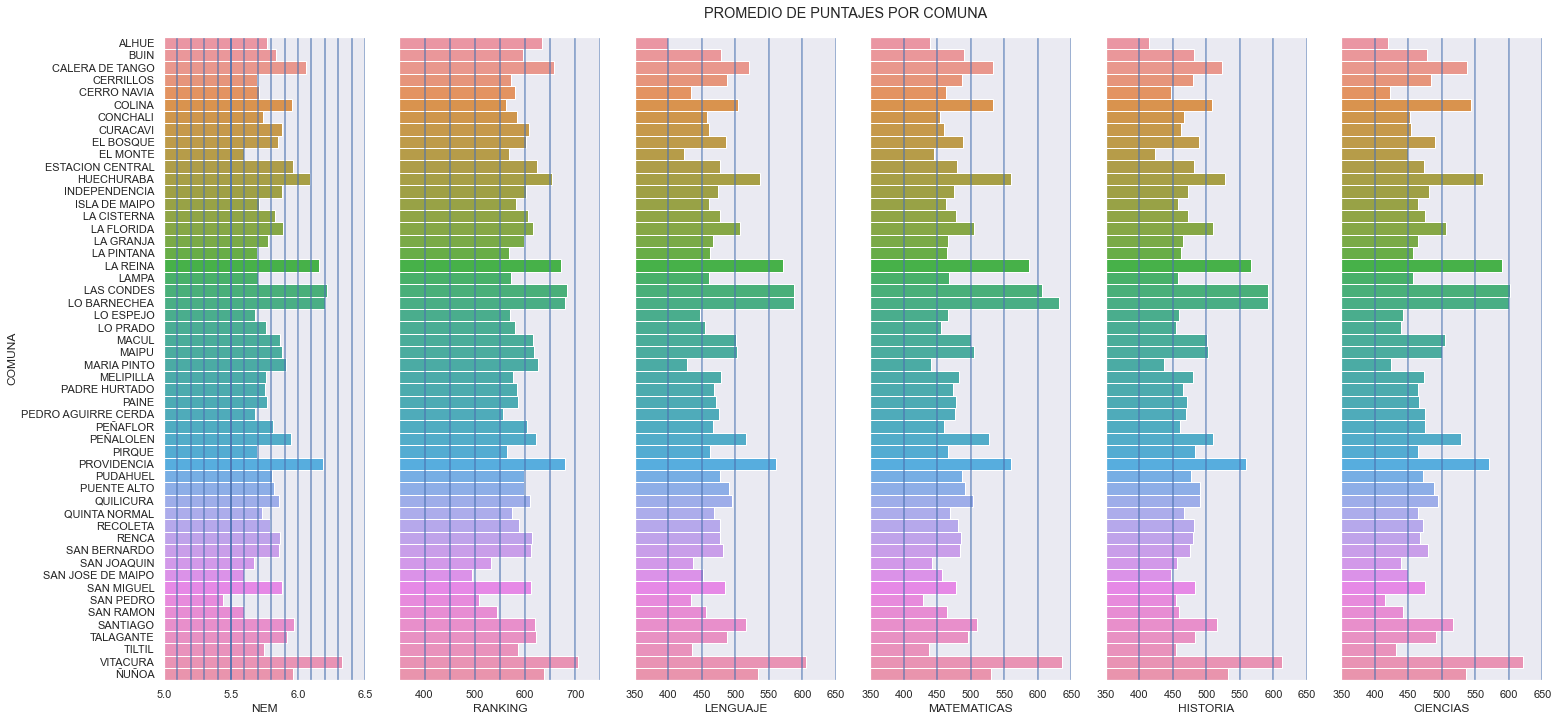

In [22]:
f, ax = plt.subplots(1,6, figsize=(20,10), sharey=True)
sns.set(font_scale=1)
cols = df_promedio.columns[1:]
f.suptitle("PROMEDIO DE PUNTAJES POR COMUNA")
f.tight_layout()
ax[0].set_xlim(5,6.5)
ax[0].set_xticks(np.arange(5,6.6,0.5))
ax[0].axvline(5.5)
for j in np.arange(5,7.1,0.1):
    ax[0].axvline(j, alpha=.75)
for i in range(0,6):
    if i != 0:
        ax[i].yaxis.set_visible(False)
        ax[i].set_xlim(350,650)
        for j in range(0,801,50):
            ax[i].axvline(j, alpha=.75)
    sns.barplot(df_promedio, y="COMUNA", x=cols[i], ax=ax[i],width=1)
ax[1].set_xlim(350,750)

### Se nota claramente como comunas (que conocemos como) más adineradas lideran el rendimiento académico en comparación con el resto.

In [12]:
comunas = gpd.read_file("Dataframes/COMUNA/COMUNAS_2020.shp").to_crs(4326)
comunas_rm = comunas[comunas["REGION"] == "Metropolitana de Santiago"].reset_index()
comunas_rm = comunas_rm[["COMUNA", "geometry"]]
comunas_rm.COMUNA = comunas_rm.COMUNA.map(lambda x:limpiar(x).upper())
comunas_rm.head()

,COMUNA,geometry
0,LO BARNECHEA,"POLYGON ((-70.33273 -33.10034, -70.33211 -33.1..."
1,PIRQUE,"POLYGON ((-70.44598 -33.57922, -70.44519 -33.5..."
2,SAN JOSE DE MAIPO,"POLYGON ((-69.86109 -34.11837, -69.86197 -34.1..."
3,PAINE,"POLYGON ((-70.61396 -33.73862, -70.61272 -33.7..."
4,MELIPILLA,"POLYGON ((-70.94808 -33.55995, -70.94808 -33.5..."


In [13]:
prom_rm = df_todo.merge(comunas_rm, on="COMUNA")
prom_rm = gpd.GeoDataFrame(prom_rm)
prom_rm.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS,INGRESOS,N_TRABAJAN,geometry
0,ALHUE,5.768235,633.235294,398.822235,438.522736,414.592590,419.576935,3.0,0.908046,"POLYGON ((-71.00925 -33.89198, -71.00817 -33.8..."
1,BUIN,5.834584,596.377888,478.751984,489.613312,481.094910,478.683990,4.0,1.115009,"POLYGON ((-70.61396 -33.73862, -70.61505 -33.7..."
2,CALERA DE TANGO,6.062634,657.846975,520.878052,533.761108,523.261169,537.232239,5.0,1.214106,"POLYGON ((-70.77075 -33.57105, -70.76915 -33.5..."
3,CERRILLOS,5.695290,571.275214,488.194214,486.797913,479.683624,483.455780,3.0,1.064081,"POLYGON ((-70.71241 -33.48121, -70.71227 -33.4..."
4,CERRO NAVIA,5.707121,580.460606,434.112915,462.518677,446.877411,422.113464,3.0,1.107692,"POLYGON ((-70.71922 -33.41332, -70.71891 -33.4..."


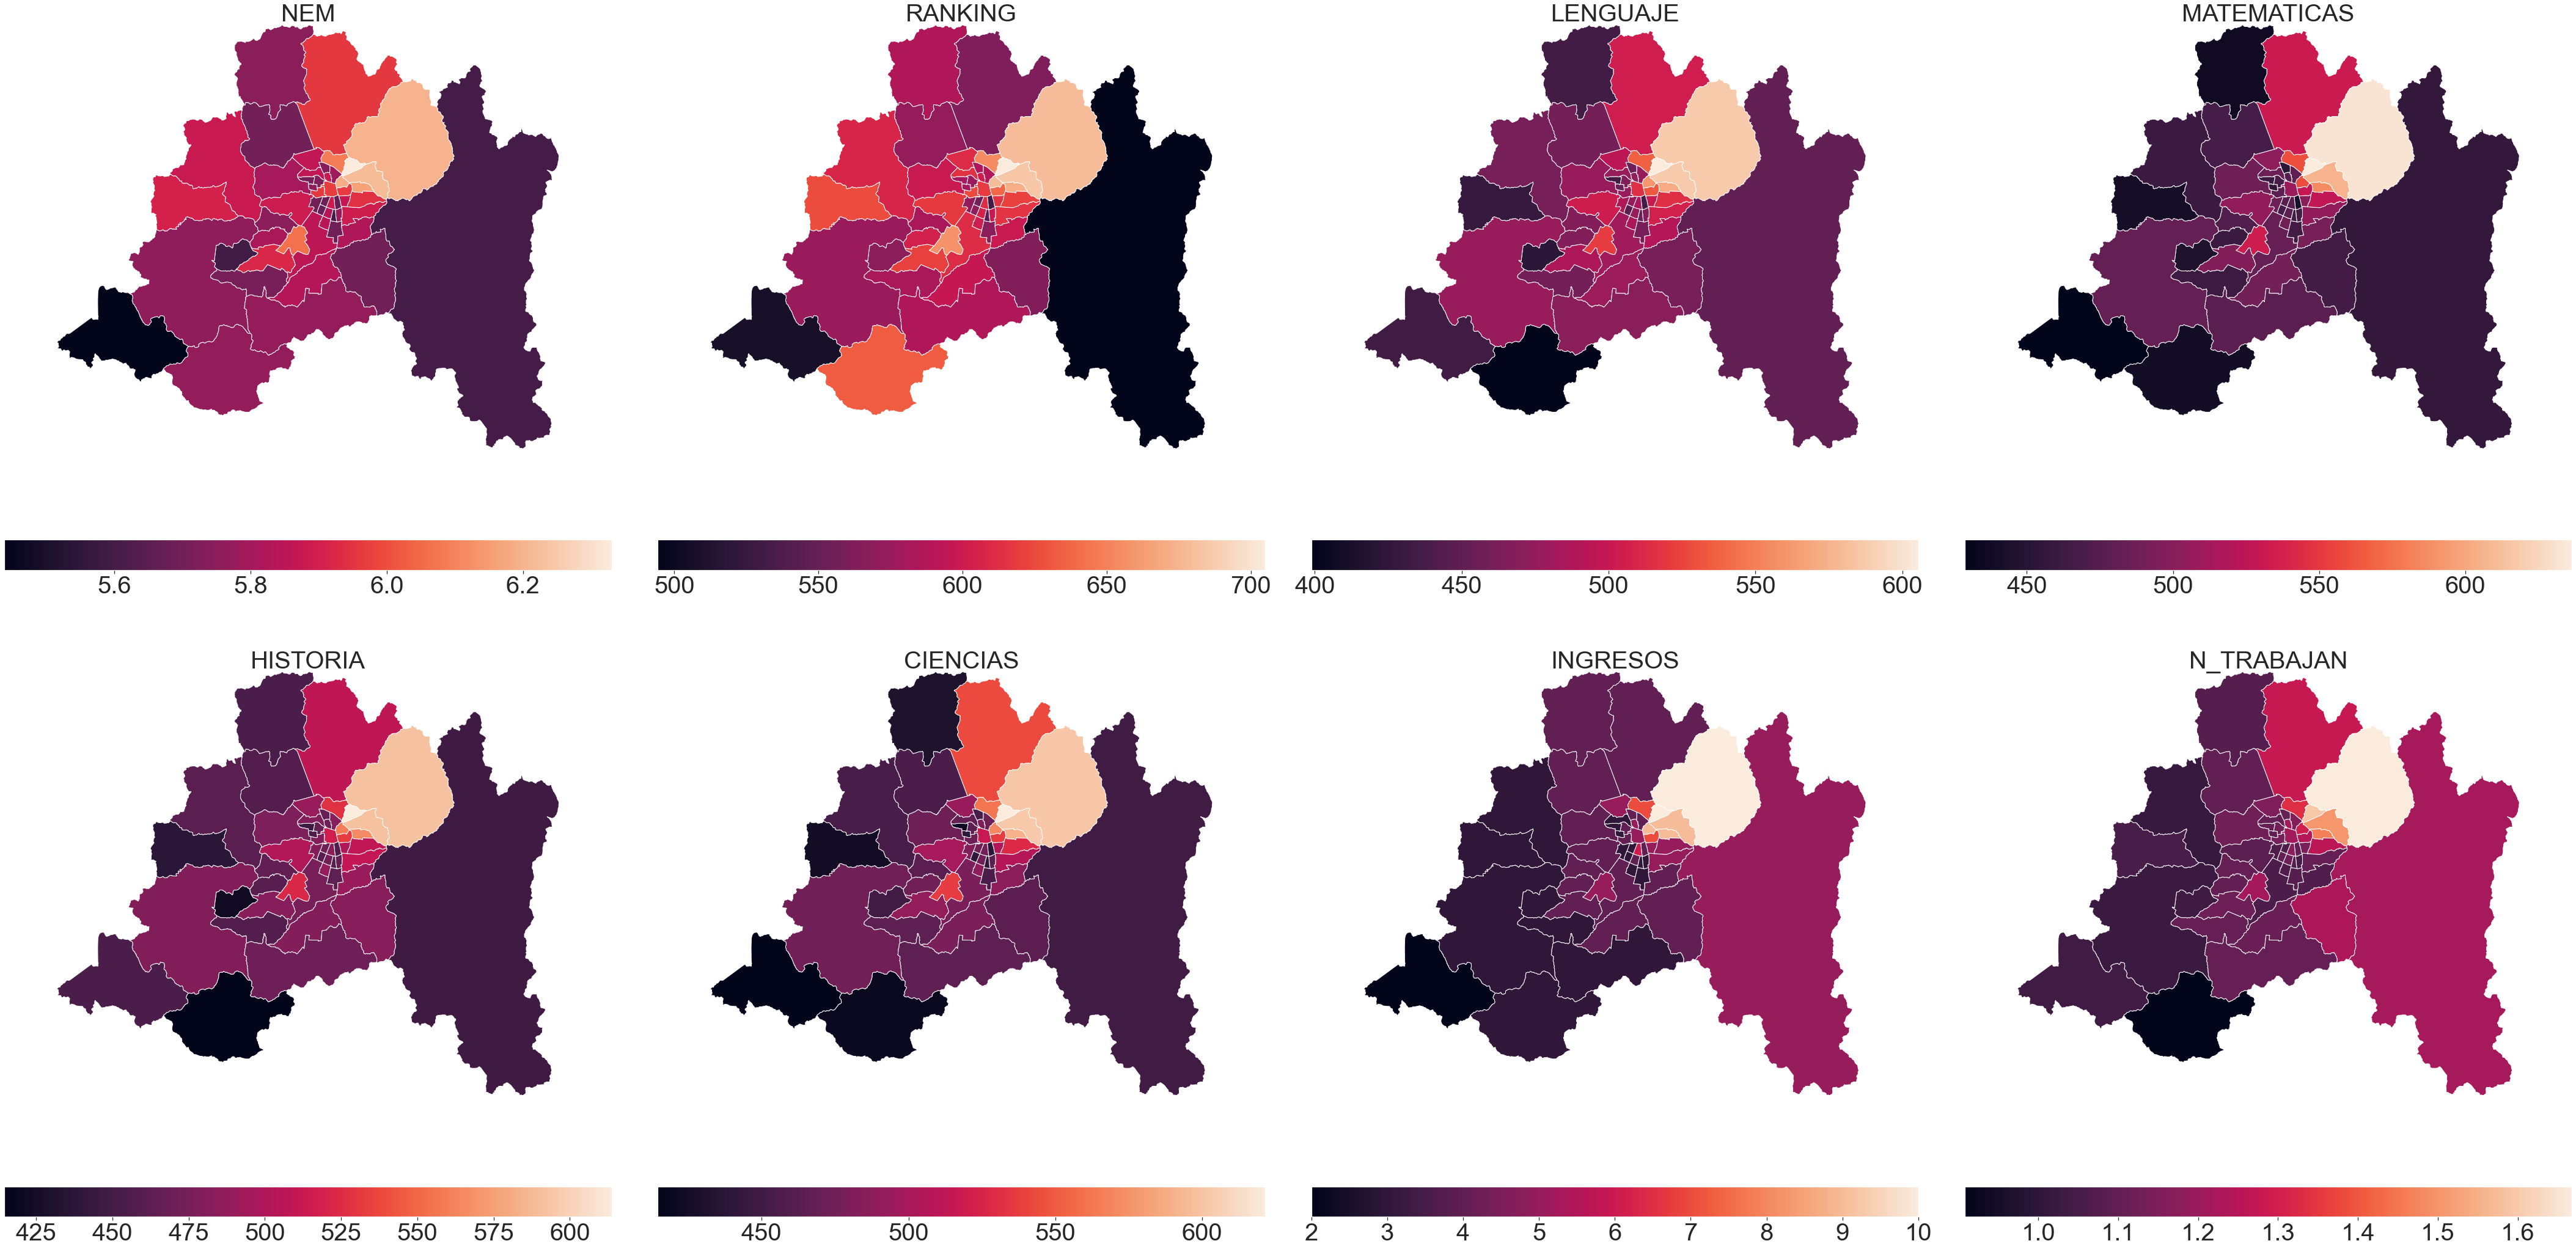

In [14]:
f, ax = plt.subplots(2,4, figsize=(60,30))
cols = prom_rm.columns[1:9]
SMALL_SIZE = 40
MEDIUM_SIZE = 50

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

f.tight_layout()
for i in range(0,2):
    for j in range(0,4):
        ax[i][j].margins(0.0001, 0.0001)
        ax[i][j].set_axis_off()
        ax[i][j].set_title(cols[i*4+j])
        prom_rm.plot(column=cols[i*4+j],legend=True, ax=ax[i][j], legend_kwds={'orientation': "horizontal"})

Se nota una correlación entre las comunas con más INGRESOS y mejores resultados académicos, notándose más la diferencia en los resultados PDT.
Además, cabe destacar que hay una ligera correlación entre cuantas personas trabajan en promedio en un hogar y los ingresos que este mismo hogar tiene, lo que claro, tiene sentido, pero también nos revela que hay sectores en los que es mucho más común que trabaje sola una persona en cada hogar.

### Nota importante: INGRESOS es la mediana por comuna, representando el decil al que pertenece el hogar según sus ingresos, mientras que N_TRABAJAN es el promedio de gente que trabaja en el hogar.

**Dataframe de asistencia y promedio por comuna **

In [15]:
df_rendimiento = pd.read_csv('Dataframes/20220302_Rendimiento_2021_20220131_WEB.csv', sep = ';',  decimal=",")
df_rendimiento

C:\Users\asus\AppData\Local\Temp\ipykernel_15468\3200872040.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rendimiento = pd.read_csv('Dataframes/20220302_Rendimiento_2021_20220131_WEB.csv', sep = ';',  decimal=",")


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.5,98,P,P,0
1,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.5,98,P,P,0
2,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,5.8,90,P,P,0
3,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0.0,0,Y,Y,0
4,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,1101,IQUIQUE,400,410,41001,4.1,70,R,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237038,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,8110,TALCAHUANO,0,0,0,0.0,0,Y,Y,0
3237039,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,13125,QUILICURA,0,0,0,6.5,100,P,P,0
3237040,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,8306,NACIMIENTO,0,0,0,5.0,100,P,P,0
3237041,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,8301,LOS ÁNGELES,0,0,0,6.6,100,P,P,0


In [16]:
#Este codigo genera el dataframe filtrado del rendimiento
df_rendimiento = df_rendimiento[df_rendimiento['EDAD_ALU'] != ' ']
df_rendimiento_rm = df_rendimiento[df_rendimiento.COD_REG_RBD == 13]
df_rendimiento_rm = df_rendimiento_rm.loc[(df_rendimiento.EDAD_ALU == 18) | (df_rendimiento.EDAD_ALU == 17)]
df_rendimiento_rm_promedio = df_rendimiento_rm.groupby('NOM_COM_RBD').mean().reset_index()
df_rendimiento_rm_promedio = df_rendimiento_rm_promedio[['COD_COM_RBD','COD_DEPE2' ,'PROM_GRAL', 'ASISTENCIA']]
comunas = df_rendimiento[['COD_COM_RBD', 'NOM_COM_RBD']]
df_final_filtrado = pd.merge(df_rendimiento_rm_promedio, comunas, on = 'COD_COM_RBD')
df_final_filtrado = df_final_filtrado.drop_duplicates().reset_index()
df_final_filtrado = df_final_filtrado[['COD_COM_RBD','COD_DEPE2','PROM_GRAL','ASISTENCIA','NOM_COM_RBD']]
df_final_filtrado

,COD_COM_RBD,COD_DEPE2,PROM_GRAL,ASISTENCIA,NOM_COM_RBD
0,13502.0,1.000000,5.484932,81.178082,ALHUÉ
1,13402.0,1.504608,5.182028,76.610599,BUIN
2,13403.0,1.888889,5.629167,83.392361,CALERA DE TANGO
3,13102.0,2.000000,4.841667,85.937500,CERRILLOS
4,13103.0,5.000000,3.677381,57.619048,CERRO NAVIA
5,13301.0,1.915847,5.543060,88.567213,COLINA
6,13104.0,2.000000,5.470881,47.107280,CONCHALÍ
7,13503.0,1.380645,5.453763,83.374194,CURACAVÍ
8,13105.0,2.000000,5.223524,76.088109,EL BOSQUE
9,13602.0,1.000000,4.494615,72.246154,EL MONTE


In [17]:
df_final_filtrado.to_csv('Dataframes/rendimiento_promedio_filtrado_2021.csv',index = False)

**Analisis exploratorio de datos**

In [18]:
df_filtrado_ploteable = df_final_filtrado[['NOM_COM_RBD', 'ASISTENCIA', 'PROM_GRAL']]
df_filtrado_ploteable=df_filtrado_ploteable.rename(columns = {'NOM_COM_RBD':'COMUNA'})
df_filtrado_ploteable

,COMUNA,ASISTENCIA,PROM_GRAL
0,ALHUÉ,81.178082,5.484932
1,BUIN,76.610599,5.182028
2,CALERA DE TANGO,83.392361,5.629167
3,CERRILLOS,85.937500,4.841667
4,CERRO NAVIA,57.619048,3.677381
5,COLINA,88.567213,5.543060
6,CONCHALÍ,47.107280,5.470881
7,CURACAVÍ,83.374194,5.453763
8,EL BOSQUE,76.088109,5.223524
9,EL MONTE,72.246154,4.494615


Notamos que si bien las comunas con mas ingresos son aquellas que estan en el intervalo mas alto de calificaciones en promedio, no necesariamente eso significa que sea debido a la cantidad de ingresos ya que existen otras comunas de menores ingresos que tambien poseen resultados altos.

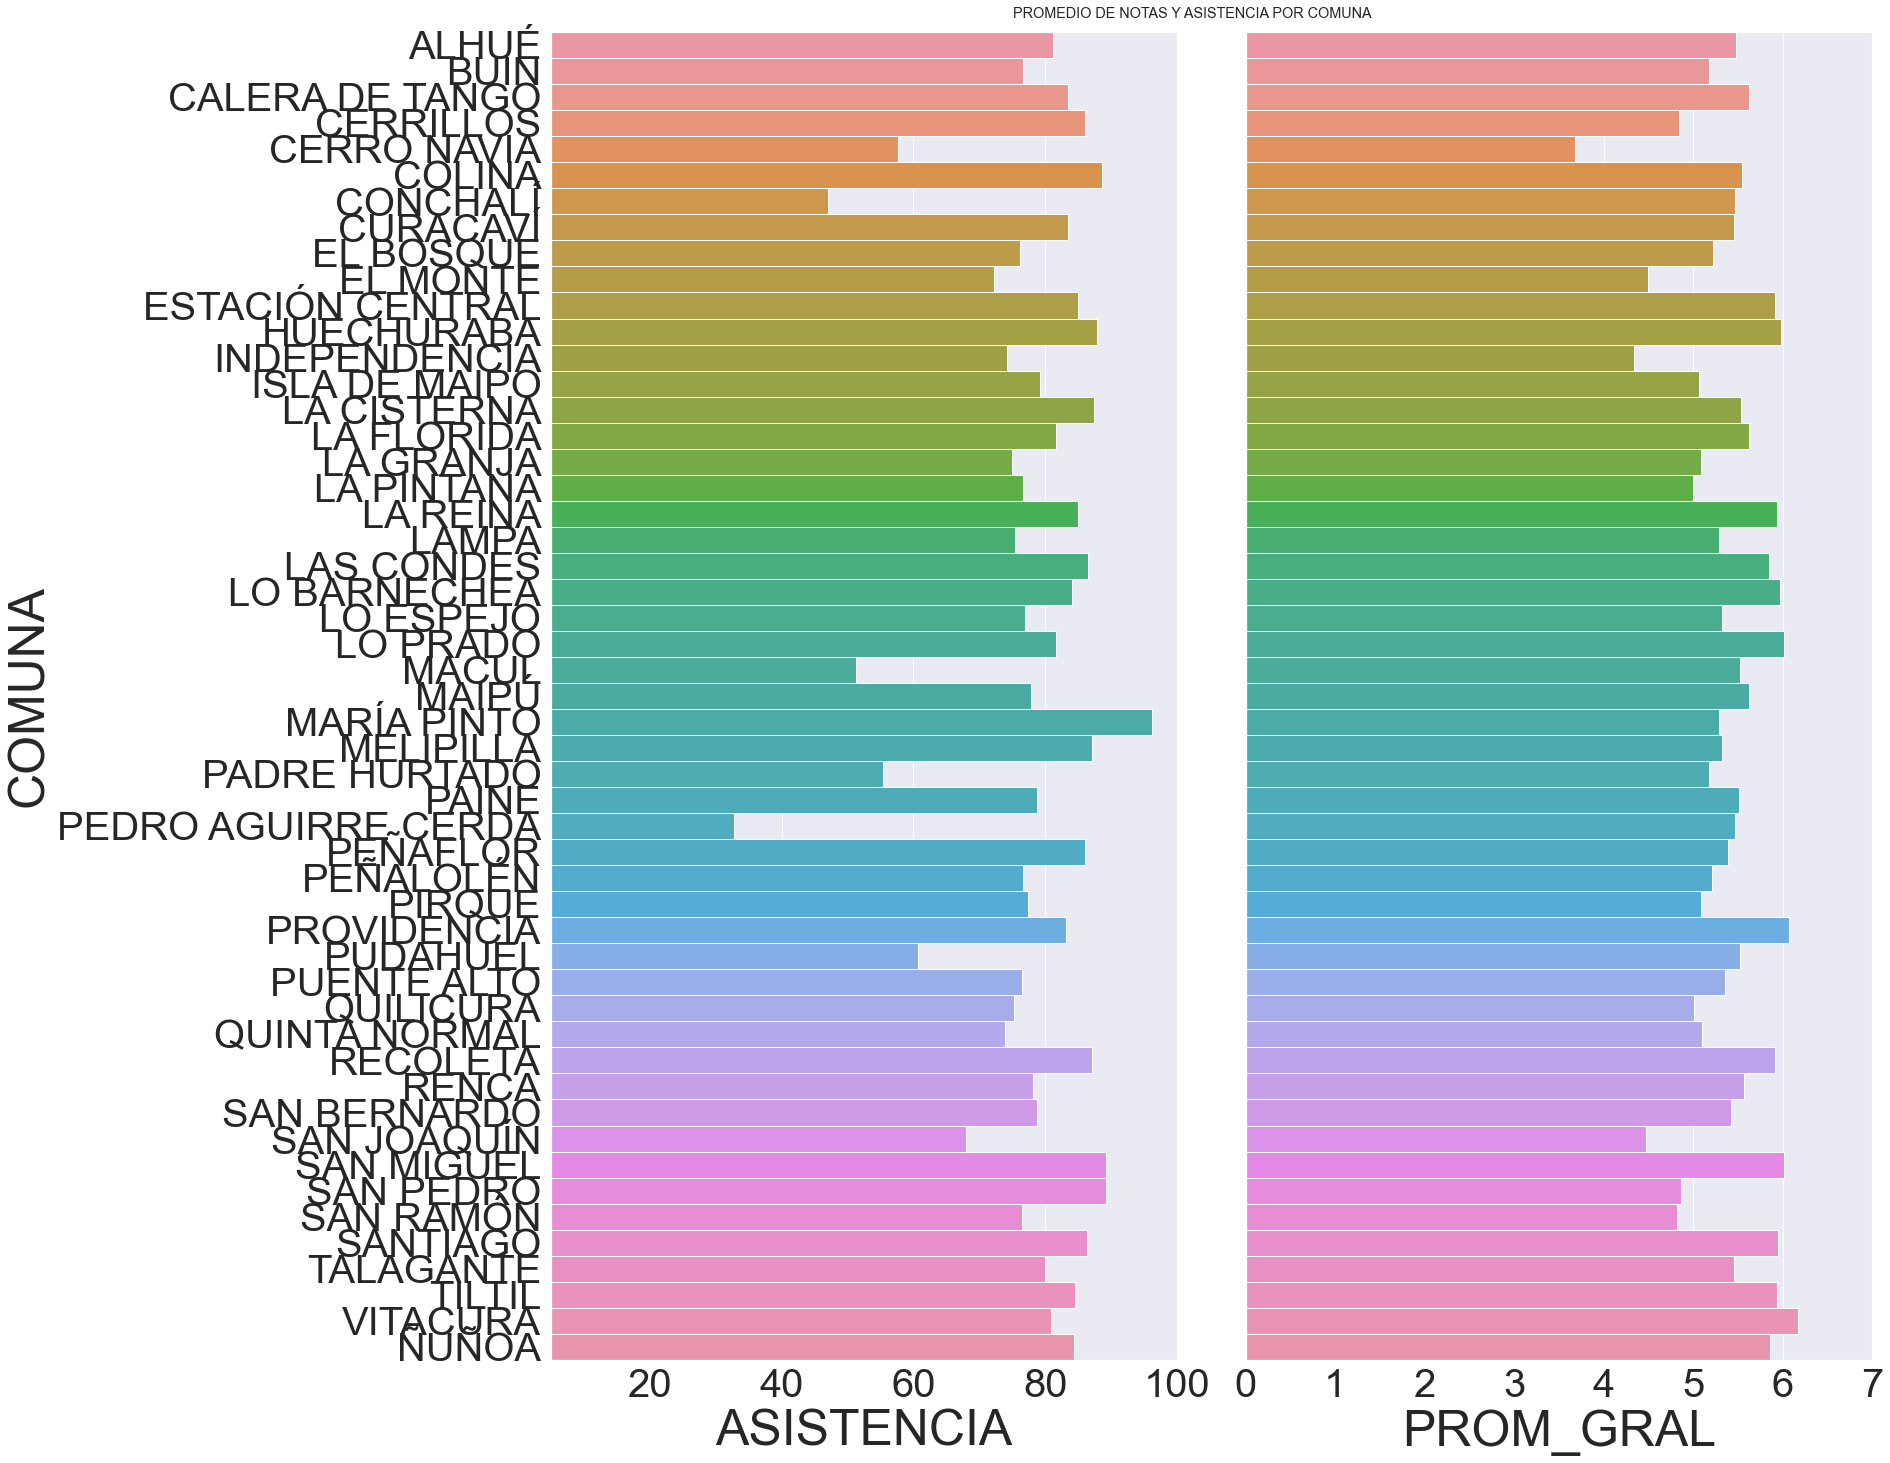

In [19]:
f, ax = plt.subplots(1,2, figsize=(20,20), sharey=True)
sns.set(font_scale=1)
cols = df_filtrado_ploteable.columns[1:]
f.suptitle("PROMEDIO DE NOTAS Y ASISTENCIA POR COMUNA")
f.tight_layout()
ax[0].set_xlim(5,100.0)
for i in range(0,2):
    if i != 0:
        if i == 1:
            ax[i].yaxis.set_visible(False)
            ax[i].set_xlim(0,7)
        else:
            ax[i].yaxis.set_visible(False)
            ax[i].set_xlim(0,200)

            
        
    sns.barplot(df_filtrado_ploteable, y="COMUNA", x=cols[i], ax=ax[i],width=1)

In [20]:
df_rendimiento = pd.read_csv('Dataframes/rendimiento_promedio_filtrado_2021.csv')
df_psu = pd.read_csv("Dataframes/promedio_puntajes_pdt.csv")

gdf_comunas = gpd.read_file("Dataframes/COMUNA/COMUNAS_2020.shp").to_crs(4326)[["geometry", "COMUNA", "REGION"]]
gdf_comunas = gdf_comunas[gdf_comunas["REGION"] == "Metropolitana de Santiago"]
gdf_comunas.COMUNA = gdf_comunas.COMUNA.map(lambda x:limpiar(x).upper())

df_rendimiento.drop(columns=["COD_COM_RBD", "COD_DEPE2"], inplace=True)
df_rendimiento.rename(columns={"NOM_COM_RBD": "COMUNA"}, inplace=True)
df_rendimiento.COMUNA = df_rendimiento.COMUNA.map(lambda x:limpiar(x).upper())
df_rendimiento.head()

,PROM_GRAL,ASISTENCIA,COMUNA
0,5.484932,81.178082,ALHUÉ
1,5.182028,76.610599,BUIN
2,5.629167,83.392361,CALERA DE TANGO
3,4.841667,85.937500,CERRILLOS
4,3.677381,57.619048,CERRO NAVIA


In [21]:
df_psu = df_psu.groupby('COMUNA').mean().reset_index()
df_psu = df_psu.drop('N_TRABAJAN', axis = 1)
df_psu.head()

KeyError: "['N_TRABAJAN'] not found in axis"

In [ ]:
gdf_todo = df_rendimiento.merge(df_psu, on="COMUNA")
gdf_todo = gdf_todo[["COMUNA", "ASISTENCIA", "NEM", "RANKING", "LENGUAJE", "MATEMATICAS", "HISTORIA", "CIENCIAS", "INGRESOS"]]
gdf_todo.head()

**Regresion lineal**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

Proposito: Predecir si existe una correlacion entre los promedios de rendimiento academico y el nivel de ingreso promedio por comuna. Es decir, ver si existe una correlacion del tipo ' A mejores resultados academicos, mejor condicion economica'

In [ ]:
x = gdf_todo.drop(['COMUNA', 'INGRESOS'], axis = 1).values
y = gdf_todo['INGRESOS']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [ ]:
#Estandarizacion de datos
train_mean = x_train.mean()
train_std = x_train.std()

names = gdf_todo.columns.drop(['COMUNA','INGRESOS'])
scaler = StandardScaler()
scaled_train = scaler.fit_transform(x_train)
x_test_standard = (x_test - train_mean) / train_std #scaler.fit_transform(x_test)
x_train_standard = pd.DataFrame(scaled_train, columns=names)

x_train_standard.head()

In [ ]:
#Testear el machine learning

ml = LinearRegression()
ml.fit(x_train, y_train)

#Predecir resultado
y_pred = ml.predict(x_test)

In [ ]:
def regression_results(y_true, y_pred, p):
    explained_variance=explained_variance_score(y_true, y_pred)
    mae=mean_absolute_error(y_true, y_pred) 
    mse=mean_squared_error(y_true, y_pred) 
    r2=r2_score(y_true, y_pred)

    n = y_true.shape[0]
    adjr2 = 1-(1-r2) * (n-1)/(n-p)

    print('Explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('adjr2: ', round(adjr2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
#Metricas lieales.
true = y_test.values
pred = y_pred
p = x_test.shape[1]
regression_results(true, pred, p=p)